##  Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original. 

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [19]:
import numpy as np

### Load and normalize our data

In [20]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [23]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


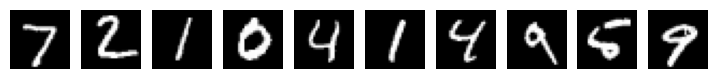

In [24]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

#### Load our pretrained model

In [27]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5', compile = False)

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 2ms/step


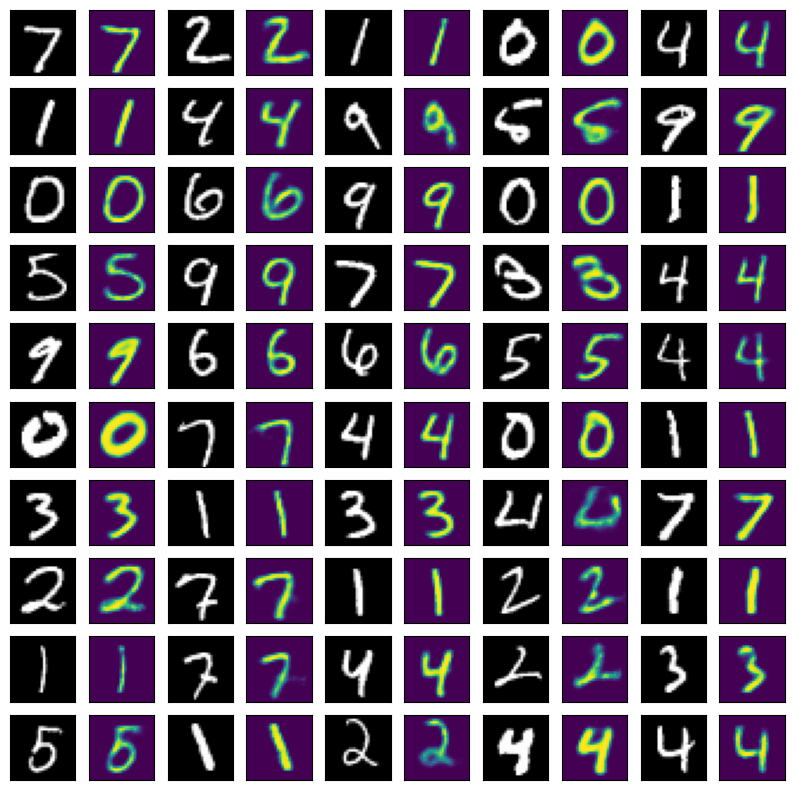

In [28]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

##  Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character). And Demonstrate your new encoding by showing the autencoder recreate a random set of digits and your new character.

In [29]:
import tensorflow as tf

from tensorflow.keras.preprocessing import image

r1 = tf.keras.utils.load_img('1Kleki.png', target_size=(28,28),color_mode= "grayscale")
r2 = tf.keras.utils.load_img('2Kleki.png', target_size=(28,28),color_mode= "grayscale")
r3 = tf.keras.utils.load_img('3Kleki.png', target_size=(28,28),color_mode= "grayscale")
r4 = tf.keras.utils.load_img('4Kleki.png', target_size=(28,28),color_mode= "grayscale")
r5 = tf.keras.utils.load_img('5Kleki.png', target_size=(28,28),color_mode= "grayscale")


In [30]:
new_images = np.vstack([r1,r2,r3,r4,r5])
test_r = new_images.reshape(-1,784)
train_r = new_images.reshape(-1,784) 
train_r = train_r.astype('float32') / 255
test_r = test_r.astype('float32') / 255

In [31]:
train_r.shape

(5, 784)

## Over Sampling

In [32]:
train_r = np.repeat(train_r[:],10, axis =0)

In [33]:
train_r.shape

(50, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

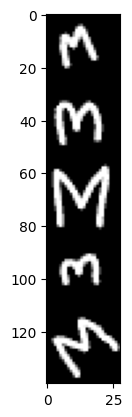

In [34]:
plt.imshow(new_images,cmap="gray")
ax.axis('off')
plt.show

In [35]:
## Create Autoencoder Model

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 10 # this is the 'bottleneck' of the autoencoder(any number)

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
 dense_12 (Dense)            (None, 100)               1100      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

In [36]:
## train the autoencoder model

In [37]:
from tensorflow.keras.callbacks import EarlyStopping 

# EarlyStopping during model training

In [38]:
new_image_set= train_images[:20000]
for i in range(len(train_r)):
    input_arr = train_r[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_r)

    bad_images = np.repeat(input_arr.reshape(-1,1,28,28),135, axis=1).reshape(-1,784)
    new_image_set = np.concatenate((new_image_set, bad_images))
    np.random.shuffle(new_image_set)

    new_images_train = new_image_set[int(len(new_image_set)*.8):]
    new_images_test = new_image_set[int(len(new_image_set)*.2):]

# Train the autoencoder data

In [39]:
    early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
    history = autoencoder.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)    
    print('r-',i+1)

Epoch 1/15
42/42 [==============================] - 1s 26ms/step - loss: 0.3735 - val_loss: 0.2835
Epoch 2/15
42/42 [==============================] - 1s 22ms/step - loss: 0.2739 - val_loss: 0.2527
Epoch 3/15
42/42 [==============================] - 1s 22ms/step - loss: 0.2423 - val_loss: 0.2283
Epoch 4/15
42/42 [==============================] - 1s 22ms/step - loss: 0.2194 - val_loss: 0.2064
Epoch 5/15
42/42 [==============================] - 1s 22ms/step - loss: 0.1967 - val_loss: 0.1907
Epoch 6/15
42/42 [==============================] - 1s 22ms/step - loss: 0.1845 - val_loss: 0.1812
Epoch 7/15
42/42 [==============================] - 1s 22ms/step - loss: 0.1770 - val_loss: 0.1758
Epoch 8/15
42/42 [==============================] - 1s 22ms/step - loss: 0.1724 - val_loss: 0.1718
Epoch 9/15
42/42 [==============================] - 1s 22ms/step - loss: 0.1688 - val_loss: 0.1690
Epoch 10/15
42/42 [==============================] - 1s 22ms/step - loss: 0.1654 - val_loss: 0.1659
Epoch 11/

## Test the data

669/669 [==============================] - 1s 2ms/step


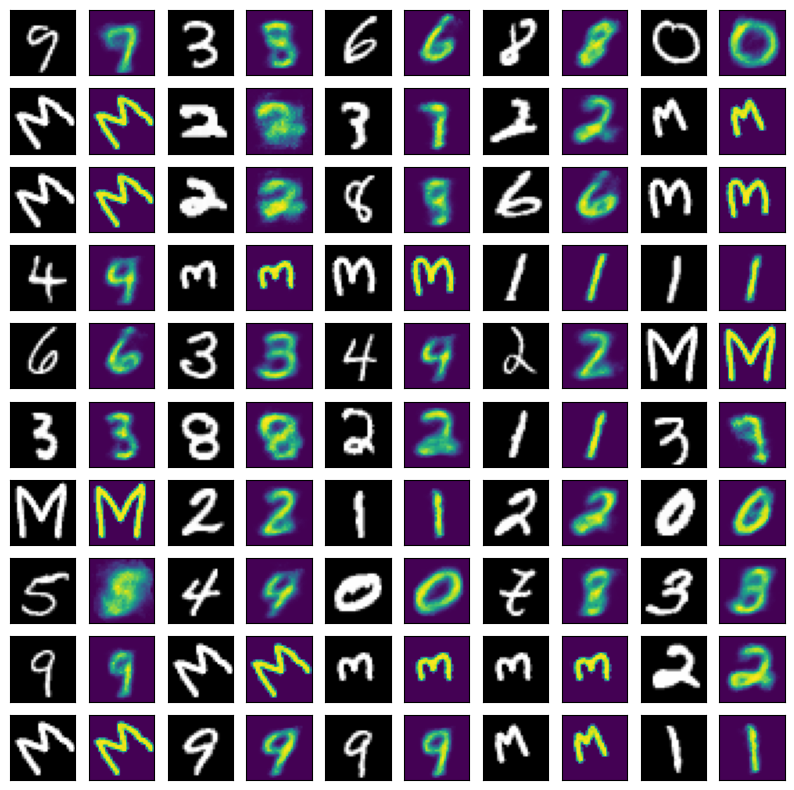

In [40]:
    reconstructed_images = autoencoder.predict(new_images_test)
    images = []
    for i in range(100):
        images.append(new_images_test[i].reshape(28,28))
        images.append(reconstructed_images[i].reshape(28,28))
    rows = 10
    cols = 10
    plt.figure(figsize=(10,10))
    for i in range(rows*cols):
        plt.subplot(rows,cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if (i%2 == 0):
            plt.imshow(images[i],cmap='gray')
        else:
            plt.imshow(images[i])
    plt.show()

In [41]:
autoencoder.save('updatedautoencoder_model.h5')